# 1. Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "C:\\Users\\dell\\Desktop\\CAROandOMNI.xlsx"
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
data.head()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\dell\\Desktop\\CAROandOMNI.xlsx'

# 2. Histogram of All Non-Zero Values

In [2]:
# Filter out zero values
non_zero_data = data[data['Vtec'] != 0]

# Plot histogram of Vtec
plt.figure(figsize=(10, 6))
plt.hist(non_zero_data['Vtec'], bins=50, edgecolor='black')
plt.title('Histogram of Non-Zero Vtec Values')
plt.xlabel('Vtec')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


NameError: name 'data' is not defined

# 3. Memory Footprint Reduction

In [3]:
# Check memory usage before optimization
print("Memory usage before optimization:")
print(data.memory_usage(deep=True))

# Optimize data types
data['Year'] = data['Year'].astype('int16')
data['Month'] = data['Month'].astype('int8')
data['Day'] = data['Day'].astype('int8')
data['Hour'] = data['Hour'].astype('int8')
data['Scalar B'] = data['Scalar B'].astype('float32')
data['SW Plasma Speed'] = data['SW Plasma Speed'].astype('float32')
data['Kp index'] = data['Kp index'].astype('float32')
data['R'] = data['R'].astype('float32')
data['Dst-index'] = data['Dst-index'].astype('float32')
data['f10.7_index'] = data['f10.7_index'].astype('float32')
data['Vtec'] = data['Vtec'].astype('float32')

# Check memory usage after optimization
print("\nMemory usage after optimization:")
print(data.memory_usage(deep=True))


Memory usage before optimization:


NameError: name 'data' is not defined

# 4. Plot Vtec Values for a Random Day Visualizing All Hours

In [4]:
# Select a random day
random_day = data.groupby(['Year', 'Month', 'Day']).size().sample(1).index[0]
day_data = data[(data['Year'] == random_day[0]) & 
                 (data['Month'] == random_day[1]) & 
                 (data['Day'] == random_day[2])]

# Plot Vtec values for the selected day
plt.figure(figsize=(12, 6))
plt.plot(day_data['Hour'], day_data['Vtec'], marker='o', linestyle='-', color='b')
plt.title(f'Vtec Values for {random_day[0]}-{random_day[1]}-{random_day[2]}')
plt.xlabel('Hour')
plt.ylabel('Vtec')
plt.xticks(range(1, 25))
plt.grid(True)
plt.show()


NameError: name 'data' is not defined

# 5. Count of Entirely Missing Date Times

In [5]:
# Check for missing datetime entries
date_times = pd.to_datetime(data[['Year', 'Month', 'Day', 'Hour']].astype(str).agg('-'.join, axis=1), errors='coerce')
missing_dates = date_times.isna().sum()

print(f"Number of entirely missing date-times: {missing_dates}")


NameError: name 'data' is not defined

# Scatter Plot for Each Column vs. Vtec

NameError: name 'data' is not defined

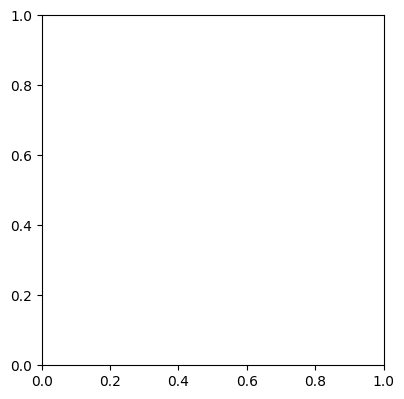

In [6]:
# List of columns to include in scatter plots
columns_to_plot = ['Scalar B', 'SW Plasma Speed', 'Kp index', 'R', 'Dst-index', 'f10.7_index']

# Create scatter plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    plt.scatter(data[col], data['Vtec'], alpha=0.5)
    plt.title(f'{col} vs Vtec')
    plt.xlabel(col)
    plt.ylabel('Vtec')
    plt.grid(True)

plt.tight_layout()
plt.show()


# Heatmap for Each Column with Vtec


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load your data
file_path = "C:\\Users\\dell\\Desktop\\CAROandOMNI.xlsx"
data = pd.read_excel(file_path)

# Define columns to exclude
exclude_columns = ['Year', 'Month', 'Day', 'Hour']

# Select only numeric columns and exclude specified columns
numeric_data = data.select_dtypes(include=['number'])
filtered_data = numeric_data.drop(columns=[col for col in exclude_columns if col in numeric_data.columns])

# Define the dependent variable
dependent_variable = 'Vtec'

# Check if the dependent variable is in the filtered data
if dependent_variable in filtered_data.columns:
    # Compute the correlation matrix
    correlation_matrix = filtered_data.corr()
    
    # Check correlation with the dependent variable
    correlation_with_vtec = correlation_matrix[[dependent_variable]].sort_values(by=dependent_variable, ascending=False)
    
    # Plot heatmap
    plt.figure(figsize=(8, 12))
    heatmap = sns.heatmap(correlation_with_vtec, vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title(f'Features Correlating with {dependent_variable}', fontdict={'fontsize':18}, pad=16)
    plt.show()
else:
    print(f"{dependent_variable} is not in the filtered data.")


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\dell\\Desktop\\CAROandOMNI.xlsx'

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the updated dataset
file_path = "C:\\Users\\dell\\Desktop\\CAROandOMNI_Updated.xlsx"
data = pd.read_excel(file_path)

# Check if 'Kp_Dst_Product' and 'Vtec' columns are in the DataFrame
if 'Kp_Dst_Product' in data.columns and 'Vtec' in data.columns:
    # Create a scatter plot of 'Kp_Dst_Product' vs 'Vtec'
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Kp_Dst_Product', y='Vtec', data=data)
    plt.title('Scatter Plot of Kp_Dst_Product vs Vtec')
    plt.xlabel('Kp_Dst_Product')
    plt.ylabel('Vtec')
    plt.grid(True)
    plt.show()
else:
    print("One or both of 'Kp_Dst_Product' and 'Vtec' columns are missing from the dataset.")


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\dell\\Desktop\\CAROandOMNI_Updated.xlsx'

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "C:\\Users\\dell\\Desktop\\CAROandOMNI.xlsx"
data = pd.read_excel(file_path)

# Feature Engineering

# 1. Interaction Term
data['Kp_Dst_Product'] = data['Kp index'] * data['Dst-index']
data['ScalarB_SWPlasmaSpeed'] = data['Scalar B'] * data['SW Plasma Speed']

# 2. Polynomial Features
data['Kp_index_squared'] = data['Kp index'] ** 2
data['Dst_index_squared'] = data['Dst-index'] ** 2

# 3. Log Transformations
data['log_Kp_index'] = np.log1p(data['Kp index'])
data['log_Dst_index'] = np.log1p(data['Dst-index'])
data['log_Scalar_B'] = np.log1p(data['Scalar B'])
data['log_SW_Plasma_Speed'] = np.log1p(data['SW Plasma Speed'])
data['log_f10.7_index'] = np.log1p(data['f10.7_index'])

# 4. Lag Features
data['Kp_index_lag1'] = data['Kp index'].shift(1)
data['Dst_index_lag1'] = data['Dst-index'].shift(1)
data['Scalar_B_lag1'] = data['Scalar B'].shift(1)
data['SW_Plasma_Speed_lag1'] = data['SW Plasma Speed'].shift(1)
data['f10.7_index_lag1'] = data['f10.7_index'].shift(1)

# 5. Rolling Window Statistics
data['Kp_index_rolling_mean'] = data['Kp index'].rolling(window=3).mean()
data['Dst_index_rolling_mean'] = data['Dst-index'].rolling(window=3).mean()
data['Scalar_B_rolling_mean'] = data['Scalar B'].rolling(window=3).mean()
data['SW_Plasma_Speed_rolling_mean'] = data['SW Plasma Speed'].rolling(window=3).mean()
data['f10.7_index_rolling_mean'] = data['f10.7_index'].rolling(window=3).mean()

data['Kp_index_rolling_std'] = data['Kp index'].rolling(window=3).std()
data['Dst_index_rolling_std'] = data['Dst-index'].rolling(window=3).std()
data['Scalar_B_rolling_std'] = data['Scalar B'].rolling(window=3).std()
data['SW_Plasma_Speed_rolling_std'] = data['SW Plasma Speed'].rolling(window=3).std()
data['f10.7_index_rolling_std'] = data['f10.7_index'].rolling(window=3).std()

# Drop rows with NaN values created by rolling and lag features
data.dropna(inplace=True)

# List of new features
new_features = ['Kp_Dst_Product', 'ScalarB_SWPlasmaSpeed', 'Kp_index_squared', 'Dst_index_squared',
                'log_Kp_index', 'log_Dst_index', 'log_Scalar_B', 'log_SW_Plasma_Speed', 'log_f10.7_index',
                'Kp_index_lag1', 'Dst_index_lag1', 'Scalar_B_lag1', 'SW_Plasma_Speed_lag1', 'f10.7_index_lag1',
                'Kp_index_rolling_mean', 'Dst_index_rolling_mean', 'Scalar_B_rolling_mean', 'SW_Plasma_Speed_rolling_mean', 'f10.7_index_rolling_mean',
                'Kp_index_rolling_std', 'Dst_index_rolling_std', 'Scalar_B_rolling_std', 'SW_Plasma_Speed_rolling_std', 'f10.7_index_rolling_std']

# Correlation matrix
corr_matrix = data[new_features + ['Vtec']].corr()

# Find top correlated features with Vtec
top_correlations = corr_matrix['Vtec'].abs().sort_values(ascending=False).head(10).index.tolist()

# Scatter Plots of Top Correlated Features vs Vtec
for feature in top_correlations:
    if feature != 'Vtec':
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=data[feature], y=data['Vtec'])
        plt.title(f'Scatter Plot of {feature} vs Vtec')
        plt.xlabel(feature)
        plt.ylabel('Vtec')
        plt.grid(True)
        plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\dell\\Desktop\\CAROandOMNI.xlsx'

In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Load the dataset
file_path = "C:\\Users\\dell\\Desktop\\CAROandOMNI.xlsx"
data = pd.read_excel(file_path)

# Convert the 'GregorianDate' column to datetime
data['GregorianDate'] = pd.to_datetime(data[['Year', 'Month', 'Day', 'Hour']])

# Set 'GregorianDate' as the index
data.set_index('GregorianDate', inplace=True)

# Ensure there are no missing values and sort by date
data = data[['Vtec']].fillna(method='ffill').sort_index()

# Normalize the Vtec values
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Vtec']])

# Prepare the time series data for RNN
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 24*30  # Using 30 days of data for each prediction

X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the RNN model
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(SEQ_LENGTH, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Predict Vtec for the first 10 days of 2024
def predict_future_values(model, last_sequence, n_steps):
    predictions = []
    current_sequence = last_sequence
    for _ in range(n_steps):
        pred = model.predict(current_sequence[np.newaxis, :, :])[0, 0]
        predictions.append(pred)
        current_sequence = np.append(current_sequence[1:], [[pred]], axis=0)
    return np.array(predictions)

# Use the last available sequence from 2023 for prediction
last_sequence = scaled_data[-SEQ_LENGTH:]
future_steps = 10 * 24  # 10 days of hourly data

future_predictions = predict_future_values(model, last_sequence, future_steps)

# Inverse transform the predictions
future_predictions = scaler.inverse_transform(future_predictions.reshape(-1, 1))

# Create a DataFrame for the predictions
prediction_dates = pd.date_range(start='2024-01-01', periods=future_steps, freq='H')
predicted_df = pd.DataFrame({'Date': prediction_dates, 'Predicted_Vtec': future_predictions.flatten()})

print(predicted_df.head())

# Optionally, you can plot the predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(predicted_df['Date'], predicted_df['Predicted_Vtec'], label='Predicted Vtec')
plt.title('Predicted Vtec for the First 10 Days of 2024')
plt.xlabel('Date')
plt.ylabel('Vtec')
plt.legend()
plt.grid(True)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\dell\\Desktop\\CAROandOMNI.xlsx'

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the actual Vtec data
actual_file_path = "C:\\Users\\dell\\Desktop\\Target.xlsx"
actual_data = pd.read_excel(actual_file_path)

# Ensure the actual data has the correct columns and format
# Adjust these column names if needed based on your actual file
actual_data['Date'] = pd.to_datetime(actual_data[['Year', 'Month', 'Day', 'Hour']])
actual_data.set_index('Date', inplace=True)

# Create a DataFrame for the actual Vtec values
actual_vtec = actual_data['Vtec']

# Load the predicted Vtec data (assuming 'predicted_df' from previous code)
# You should have the 'predicted_df' DataFrame from the previous prediction code
# If you don't have it, you'll need to ensure it's created in the same format

# Example: Load the predictions DataFrame
# If you have saved it to an Excel file, load it as follows
# predictions_file_path = "path_to_predictions_file.xlsx"
# predicted_df = pd.read_excel(predictions_file_path)

# For this example, we use the 'predicted_df' from the previous code
# Make sure it is aligned with the actual data dates

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(actual_vtec.index, actual_vtec.values, label='Actual Vtec', color='blue')
plt.plot(predicted_df['Date'], predicted_df['Predicted_Vtec'], label='Predicted Vtec', color='red', linestyle='--')
plt.title('Actual vs Predicted Vtec (First 10 Days of 2024)')
plt.xlabel('Date')
plt.ylabel('Vtec')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\dell\\Desktop\\Target.xlsx'

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the actual Vtec data
actual_file_path = "C:\\Users\\dell\\Desktop\\Target.xlsx"
actual_data = pd.read_excel(actual_file_path)

# Ensure the actual data has the correct columns and format
actual_data['Date'] = pd.to_datetime(actual_data[['Year', 'Month', 'Day', 'Hour']])
actual_data.set_index('Date', inplace=True)

# Filter data for January 1, 2024
specific_date = '2024-01-01'
actual_day_data = actual_data.loc[specific_date]

# Load the predicted Vtec data
# If you have saved it to an Excel file, load it as follows
# predictions_file_path = "path_to_predictions_file.xlsx"
# predicted_df = pd.read_excel(predictions_file_path)

# Example predicted_df creation for demonstration purposes
# This should be replaced with your actual predictions DataFrame
predicted_df = pd.DataFrame({
    'Date': pd.date_range(start='2024-01-01', end='2024-01-01 23:00:00', freq='H'),
    'Predicted_Vtec': [0] * 24  # Replace with actual predicted values
})

predicted_df.set_index('Date', inplace=True)

# Filter predictions for January 1, 2024
predicted_day_data = predicted_df.loc[specific_date]

# Plotting the results for January 1, 2024
plt.figure(figsize=(12, 6))
plt.plot(actual_day_data.index, actual_day_data['Vtec'], label='Actual Vtec', color='blue')
plt.plot(predicted_day_data.index, predicted_day_data['Predicted_Vtec'], label='Predicted Vtec', color='red', linestyle='--')
plt.title(f'Actual vs Predicted Vtec for {specific_date}')
plt.xlabel('Hour of the Day')
plt.ylabel('Vtec')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\dell\\Desktop\\Target.xlsx'

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "C:\\Users\\dell\\Desktop\\CAROandOMNI.xlsx"
data = pd.read_excel(file_path)

# Feature Engineering

# 1. Interaction Term
data['Kp_Dst_Product'] = data['Kp index'] * data['Dst-index']
data['ScalarB_SWPlasmaSpeed'] = data['Scalar B'] * data['SW Plasma Speed']

# 2. Polynomial Features
data['Kp_index_squared'] = data['Kp index'] ** 2
data['Dst_index_squared'] = data['Dst-index'] ** 2

# 3. Log Transformations
data['log_Kp_index'] = np.log1p(data['Kp index'])
data['log_Dst_index'] = np.log1p(data['Dst-index'])
data['log_Scalar_B'] = np.log1p(data['Scalar B'])
data['log_SW_Plasma_Speed'] = np.log1p(data['SW Plasma Speed'])
data['log_f10.7_index'] = np.log1p(data['f10.7_index'])

# 4. Lag Features
data['Kp_index_lag1'] = data['Kp index'].shift(1)
data['Dst_index_lag1'] = data['Dst-index'].shift(1)
data['Scalar_B_lag1'] = data['Scalar B'].shift(1)
data['SW_Plasma_Speed_lag1'] = data['SW Plasma Speed'].shift(1)
data['f10.7_index_lag1'] = data['f10.7_index'].shift(1)

# 5. Rolling Window Statistics
data['Kp_index_rolling_mean'] = data['Kp index'].rolling(window=3).mean()
data['Dst_index_rolling_mean'] = data['Dst-index'].rolling(window=3).mean()
data['Scalar_B_rolling_mean'] = data['Scalar B'].rolling(window=3).mean()
data['SW_Plasma_Speed_rolling_mean'] = data['SW Plasma Speed'].rolling(window=3).mean()
data['f10.7_index_rolling_mean'] = data['f10.7_index'].rolling(window=3).mean()

data['Kp_index_rolling_std'] = data['Kp index'].rolling(window=3).std()
data['Dst_index_rolling_std'] = data['Dst-index'].rolling(window=3).std()
data['Scalar_B_rolling_std'] = data['Scalar B'].rolling(window=3).std()
data['SW_Plasma_Speed_rolling_std'] = data['SW Plasma Speed'].rolling(window=3).std()
data['f10.7_index_rolling_std'] = data['f10.7_index'].rolling(window=3).std()

# Drop rows with NaN values created by rolling and lag features
data.dropna(inplace=True)

# List of new features
new_features = ['Kp_Dst_Product', 'ScalarB_SWPlasmaSpeed', 'Kp_index_squared', 'Dst_index_squared',
                'log_Kp_index', 'log_Dst_index', 'log_Scalar_B', 'log_SW_Plasma_Speed', 'log_f10.7_index',
                'Kp_index_lag1', 'Dst_index_lag1', 'Scalar_B_lag1', 'SW_Plasma_Speed_lag1', 'f10.7_index_lag1',
                'Kp_index_rolling_mean', 'Dst_index_rolling_mean', 'Scalar_B_rolling_mean', 'SW_Plasma_Speed_rolling_mean', 'f10.7_index_rolling_mean',
                'Kp_index_rolling_std', 'Dst_index_rolling_std', 'Scalar_B_rolling_std', 'SW_Plasma_Speed_rolling_std', 'f10.7_index_rolling_std']

# Correlation matrix
corr_matrix = data[new_features + ['Vtec']].corr()

# Find top correlated features with Vtec
top_correlations = corr_matrix['Vtec'].abs().sort_values(ascending=False).head(10).index.tolist()

# Scatter Plots of Top Correlated Features vs Vtec
for feature in top_correlations:
    if feature != 'Vtec':
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=data[feature], y=data['Vtec'])
        plt.title(f'Scatter Plot of {feature} vs Vtec')
        plt.xlabel(feature)
        plt.ylabel('Vtec')
        plt.grid(True)
        plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\dell\\Desktop\\CAROandOMNI.xlsx'

# Another Approach


In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

# Load the 2023 dataset
file_path_2023 = "C:\\Users\\dell\\Desktop\\CAROandOMNI.xlsx"
data_2023 = pd.read_excel(file_path_2023)

# Load the actual Vtec data for the first 10 days of 2024
actual_file_path_2024 = "C:\\Users\\dell\\Desktop\\Excell\\Target.xlsx"
data_2024 = pd.read_excel(actual_file_path_2024)

# Ensure the data has the correct columns and format
data_2023['Date'] = pd.to_datetime(data_2023[['Year', 'Month', 'Day', 'Hour']])
data_2023.set_index('Date', inplace=True)

data_2024['Date'] = pd.to_datetime(data_2024[['Year', 'Month', 'Day', 'Hour']])
data_2024.set_index('Date', inplace=True)

# Combine datasets
combined_data = pd.concat([data_2023, data_2024], axis=0)

# Ensure there are no missing values and sort by date
combined_data = combined_data[['Vtec']].fillna(method='ffill').sort_index()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\dell\\Desktop\\CAROandOMNI.xlsx'

In [15]:
# Normalize the Vtec values
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(combined_data[['Vtec']])


NameError: name 'combined_data' is not defined

In [16]:
# Prepare the time series data for RNN
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 24 * 30  # Using 30 days of data for each prediction

X, y = create_sequences(scaled_data, SEQ_LENGTH)


NameError: name 'scaled_data' is not defined

In [17]:
# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the RNN model
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(SEQ_LENGTH, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)


NameError: name 'X' is not defined

In [18]:
# Predict Vtec for the first 10 days of 2024
def predict_future_values(model, last_sequence, n_steps):
    predictions = []
    current_sequence = last_sequence
    for _ in range(n_steps):
        pred = model.predict(current_sequence[np.newaxis, :, :])[0, 0]
        predictions.append(pred)
        current_sequence = np.append(current_sequence[1:], [[pred]], axis=0)
    return np.array(predictions)

# Use the last available sequence from the combined data for prediction
last_sequence = scaled_data[-SEQ_LENGTH:]
future_steps = 10 * 24  # 10 days of hourly data

future_predictions = predict_future_values(model, last_sequence, future_steps)

# Inverse transform the predictions
future_predictions = scaler.inverse_transform(future_predictions.reshape(-1, 1))

# Create a DataFrame for the predictions
prediction_dates = pd.date_range(start='2024-01-01', periods=future_steps, freq='H')
predicted_df = pd.DataFrame({'Date': prediction_dates, 'Predicted_Vtec': future_predictions.flatten()})

print(predicted_df.head())


NameError: name 'scaled_data' is not defined

In [19]:
# Filter the actual data for the first 10 days of January 2024
start_date = '2024-01-01'
end_date = '2024-01-10 23:59:59'
actual_vtec = actual_data.loc[start_date:end_date, 'Vtec']

# Filter the predicted data for the first 10 days of January 2024
predicted_df['Date'] = pd.to_datetime(predicted_df['Date'])
predicted_vtec = predicted_df[(predicted_df['Date'] >= start_date) & (predicted_df['Date'] <= end_date)]

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(actual_vtec.index, actual_vtec.values, label='Actual Vtec', color='blue')
plt.plot(predicted_vtec['Date'], predicted_vtec['Predicted_Vtec'], label='Predicted Vtec', color='red', linestyle='--')
plt.title('Actual vs Predicted Vtec (First 10 Days of January 2024)')
plt.xlabel('Date')
plt.ylabel('Vtec')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


NameError: name 'actual_data' is not defined

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

# Load the 2023 dataset
file_path_2023 = "C:\\Users\\dell\\Desktop\\CAROandOMNI.xlsx"
data_2023 = pd.read_excel(file_path_2023)

# Load the actual Vtec data for the first 10 days of 2024
actual_file_path_2024 = "C:\\Users\\dell\\Desktop\\Target.xlsx"
data_2024 = pd.read_excel(actual_file_path_2024)

# Ensure the data has the correct columns and format
data_2023['Date'] = pd.to_datetime(data_2023[['Year', 'Month', 'Day', 'Hour']])
data_2023.set_index('Date', inplace=True)

data_2024['Date'] = pd.to_datetime(data_2024[['Year', 'Month', 'Day', 'Hour']])
data_2024.set_index('Date', inplace=True)

# Combine datasets but exclude January 2024 from training data
combined_data = pd.concat([data_2023, data_2024], axis=0)

# Exclude January 2024 from the training data
train_data = combined_data[combined_data.index < '2024-01-01']
test_data = combined_data[combined_data.index >= '2024-01-01']

# Ensure there are no missing values and sort by date
train_data = train_data[['Vtec']].fillna(method='ffill').sort_index()
test_data = test_data[['Vtec']].fillna(method='ffill').sort_index()

# Normalize the Vtec values
scaler = MinMaxScaler()
scaled_train_data = scaler.fit_transform(train_data[['Vtec']])

# Prepare the time series data for RNN
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 24 * 30  # Using 30 days of data for each prediction

X, y = create_sequences(scaled_train_data, SEQ_LENGTH)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the RNN model
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(SEQ_LENGTH, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Predict Vtec for January 2024
def predict_future_values(model, last_sequence, n_steps):
    predictions = []
    current_sequence = last_sequence
    for _ in range(n_steps):
        pred = model.predict(current_sequence[np.newaxis, :, :])[0, 0]
        predictions.append(pred)
        current_sequence = np.append(current_sequence[1:], [[pred]], axis=0)
    return np.array(predictions)

# Use the last available sequence from the combined data (up to end of December 2023) for prediction
last_sequence = scaled_train_data[-SEQ_LENGTH:]
future_steps = 10 * 24  # 10 days of hourly data

future_predictions = predict_future_values(model, last_sequence, future_steps)

# Inverse transform the predictions
future_predictions = scaler.inverse_transform(future_predictions.reshape(-1, 1))

# Create a DataFrame for the predictions
prediction_dates = pd.date_range(start='2024-01-01', periods=future_steps, freq='H')
predicted_df = pd.DataFrame({'Date': prediction_dates, 'Predicted_Vtec': future_predictions.flatten()})

# Filter the actual data for January 1, 2024
start_date = '2024-01-01'
end_date = '2024-01-01 23:59:59'
actual_vtec = data_2024.loc[start_date:end_date, 'Vtec']

# Filter the predicted data for January 1, 2024
predicted_vtec = predicted_df[(predicted_df['Date'] >= start_date) & (predicted_df['Date'] <= end_date)]

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(actual_vtec.index, actual_vtec.values, label='Actual Vtec', color='blue')
plt.plot(predicted_vtec['Date'], predicted_vtec['Predicted_Vtec'], label='Predicted Vtec', color='red', linestyle='--')
plt.title('Actual vs Predicted Vtec for January 1, 2024')
plt.xlabel('Hour of the Day')
plt.ylabel('Vtec')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\dell\\Desktop\\CAROandOMNI.xlsx'